There's a great 3D terrain tutorial at [Robot frog](http://www.stuffwithstuff.com/robot-frog/3d/hills/index.html). I've always wanted to implement 3D terrain, so let's follow the steps along.

# What's a terrain? 

We'll represent our 3D terrain using 2D numpy arrays. So let's write a function that does just that:

In [28]:
import numpy as np

def create_terrain(n_x, n_y):
    "Creates coordinates for a n_x times n_y grid for a terrain."
    Y, X = np.meshgrid(np.arange(n_x),
                      np.arange(n_y))
    Z = np.zeros_like(X, dtype=np.float)
    return (X, Y, Z)

In [29]:
terrain = create_terrain(100, 50)

Let's now produce a function that displays a terrain:

In [30]:
%matplotlib notebook

In [64]:
import matplotlib.pyplot as plt
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

def plot_terrain(terrain):
    "Plots a terrain in 3D."
    X, Y, Z = terrain
    ax = plt.axes(projection='3d')
    #ax.plot_surface(X, Y, Z)
    ax.plot_wireframe(X, Y, Z)

<IPython.core.display.Javascript object>


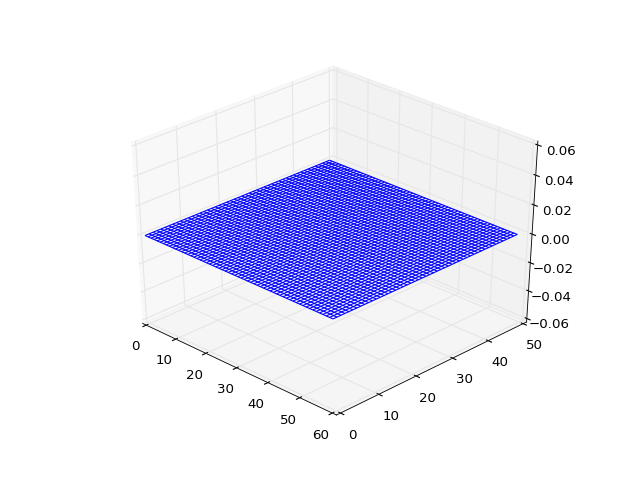

In [65]:
plt.figure()
plot_terrain(terrain)

# The hill algorithm 

Let's now apply the hill algorithm. It's simple:

In [137]:
def add_hill(terrain):
    "Adds an hill to an existing terrain."
    X, Y, Z = terrain
    center = (np.random.randint(X.shape[0]),
              np.random.randint(X.shape[1]))
    x, y = X[center], Y[center]
    r = np.random.rand() * max(X.shape) / 5.
    height = r**2 - (X - x)**2 - (Y - y)**2
    new_Z = Z + height * (height >= 0)
    return (X, Y, new_Z)

<IPython.core.display.Javascript object>


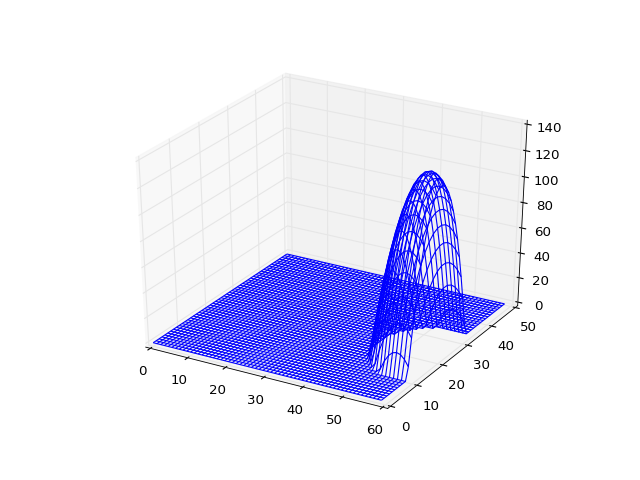

In [138]:
plt.figure()
terrain = create_terrain(50, 60)
plot_terrain(add_hill(terrain))

We can now apply this algorithm several times in a row:

<IPython.core.display.Javascript object>


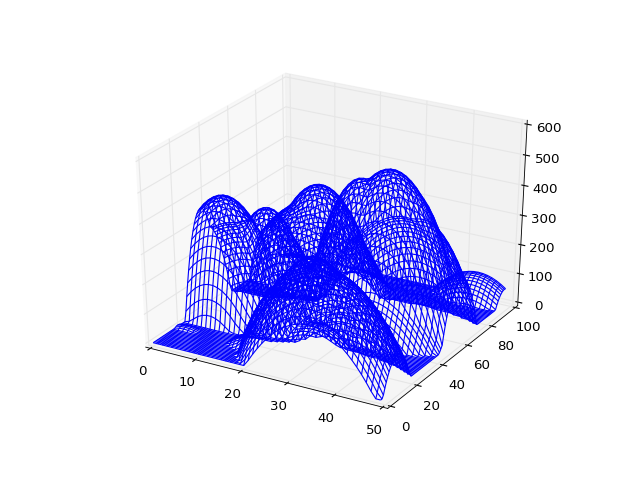

In [139]:
terrain = create_terrain(100, 50)
for i in range(20):
    terrain = add_hill(terrain)
    
plt.figure()
plot_terrain(terrain)

After 100 iterations:

<IPython.core.display.Javascript object>


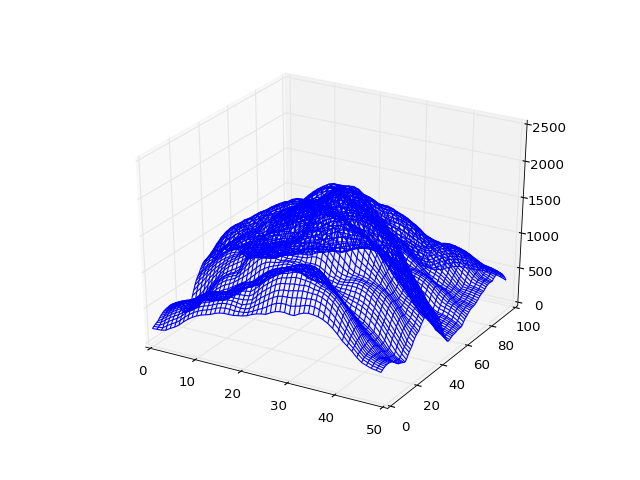

In [140]:
terrain = create_terrain(100, 50)
for i in range(100):
    terrain = add_hill(terrain)
    
plt.figure()
plot_terrain(terrain)

After 200 iterations:

<IPython.core.display.Javascript object>


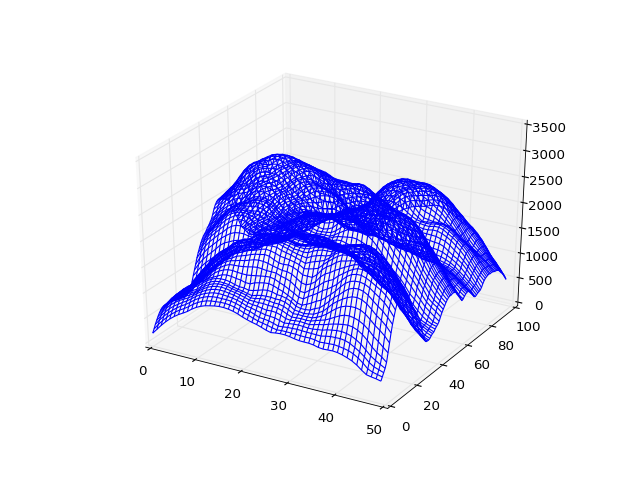

In [141]:
terrain = create_terrain(100, 50)
for i in range(200):
    terrain = add_hill(terrain)
    
plt.figure()
plot_terrain(terrain)

# Normalization 

Let's now normalize the height of the terrain.

In [142]:
def normalize(terrain):
    "Normalizes a terrain."
    X, Y, Z = terrain
    return (X, Y, (Z - Z.min())/(Z.max() - Z.min()))

<IPython.core.display.Javascript object>


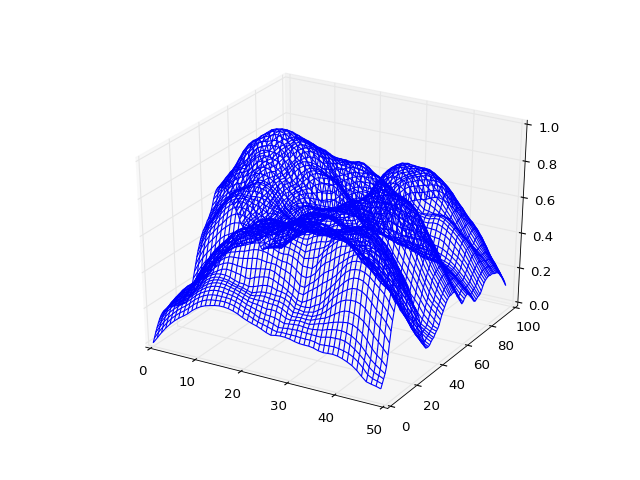

In [143]:
plt.figure()
plot_terrain(normalize(terrain))

# Flattening 

Let's now apply some flattening.

In [144]:
def flatten(terrain):
    "Flattens a terrain using a nonlinear mapping."
    X, Y, Z = terrain
    return (X, Y, np.square(Z))

<IPython.core.display.Javascript object>


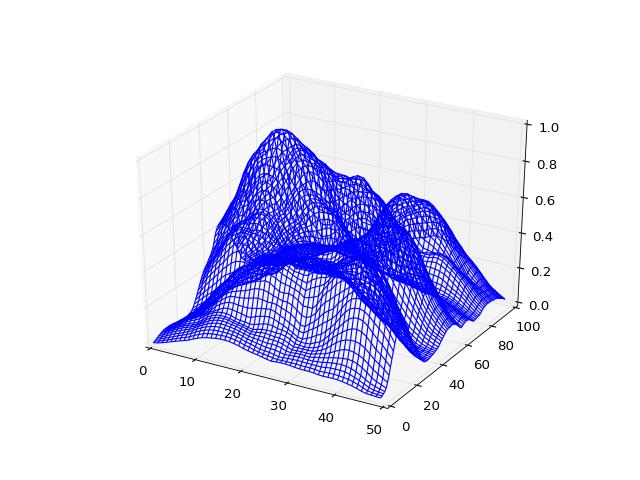

In [145]:
plt.figure()
plot_terrain(normalize(flatten(terrain)))

As one can see, the obtained terrain looks quite realistic. The flattening in particular makes a lot more peaks visible.

# Experimenting with the hillshading available in matplotlib 

<IPython.core.display.Javascript object>


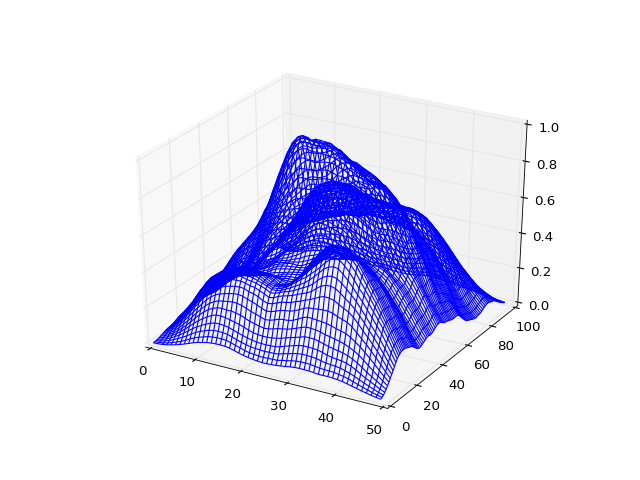

In [146]:
terrain = create_terrain(100, 50)
for i in range(1000):
    terrain = add_hill(terrain)
terrain = flatten(normalize(terrain))    
plt.figure()
plot_terrain(terrain)

In [154]:
from matplotlib.colors import LightSource, Normalize

def plot_terrain_with_hillshade(terrain):
    "Plots a terrain using the matplotlib hillshade."
    X, Y, Z = terrain
    cmap = plt.cm.jet
    ls = LightSource(250, 65)
    rgb = ls.shade(Z, cmap)
    fig, ax = plt.subplots()
    ax.imshow(rgb)

<IPython.core.display.Javascript object>


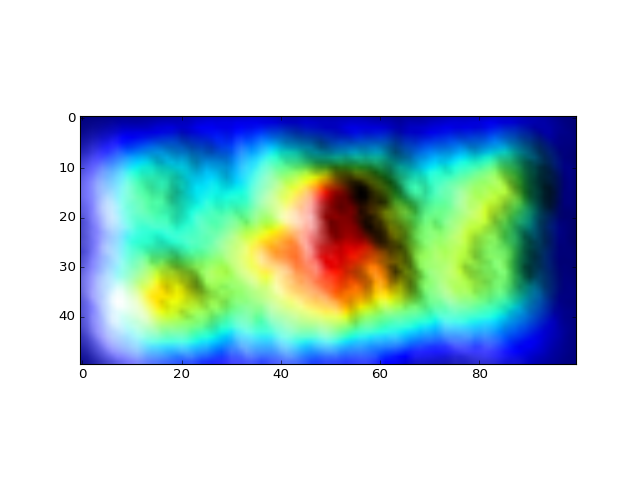

In [155]:
plot_terrain_with_hillshade(terrain)

# Conclusions 

That's it! I think the steps used here were quite simple. It's interesting to see the results, even though they're not terribly realistic.